In [1]:
import MGrowth as mg
import numpy as np
try: import evogrowthpy as evgr
except: print("evogrowthpy is not installed!")

import time
import matplotlib.pyplot as plt

zz = [0.9, 1.2, 1.5, 1.8]
aa = 1./(1.+np.array(zz[::-1])) ##should be increasing

omega0 = 0.31
h = 0.74
w0 = -1.3
wa = -1.4
background ={'Omega_m': omega0,
            'h' : h,
            'w0': w0,
            'wa': wa,
            'a_arr': aa}

xi = 20.
fR0 = 1.e-5
omegarc = 0.001
gamma = 0.6
gamma0 = 0.6
gamma1 = -2.

evogrowthpy is not installed!


### Benchmarking with evogrowthpy
In case evogrowth is not installed, the values for the growth factors are read out from the file "evogrowth_benchmark.dat".

In [2]:
evgr_Df = np.genfromtxt('evogrowth_benchmark.dat')

cosmo1 = mg.LCDM(background)
start = time.time()
D, f = cosmo1.growth_parameters()
finish = time.time()
print('4 redshift bins')
print('LCDM:')
print('MGrowth time: ', finish-start)
try: 
    start = time.time()
    output = [evgr.get_growth_wrap(omega0,h,[zbin_i,-1.,0.,0.]) for zbin_i in zz]
    Dp = [D_i for D_i, _ in output]
    fp = [f_i for _, f_i in output]
    finish = time.time()
    print('Evogrowthpy time: ', finish-start)
except:
    Dp = evgr_Df[0]    
    fp = evgr_Df[1] 
    print('Evogrowthpy time: ', evgr_Df[-1][0])
print('D_mg/D_evo: ', D[::-1]/Dp)
print('f_mg/f_evo: ', f[::-1]/fp)

cosmo1 = mg.wCDM(background)
start = time.time()
D, f = cosmo1.growth_parameters()
finish = time.time()
print('-----')
print('wCDM')
print('MGrowth time: ', finish-start)
try: 
    start = time.time()
    output = [evgr.get_growth_wrap(omega0,h,[zbin_i,w0,0.,0.]) for zbin_i in zz]
    Dp = [D_i for D_i, _ in output]
    fp = [f_i for _, f_i in output]
    finish = time.time()
    print('Evogrowthpy time: ', finish-start)
except:
    Dp = evgr_Df[2]    
    fp = evgr_Df[3] 
    print('Evogrowthpy time: ', evgr_Df[-1][1])
print('D_mg/D_evo: ', D[::-1]/Dp)
print('f_mg/f_evo: ', f[::-1]/fp)


cosmo1 = mg.w0waCDM(background)
start = time.time()
D, f = cosmo1.growth_parameters()
finish = time.time()
print('-----')
print('w0waCDM')
print('MGrowth time: ', finish-start)
try: 
    start = time.time()
    output = [evgr.get_growth_wrap(omega0,h,[zbin_i,w0,wa,0.]) for zbin_i in zz]
    Dp = [D_i for D_i, _ in output]
    fp = [f_i for _, f_i in output]
    finish = time.time()
    print('Evogrowthpy time: ', finish-start)
except:
    Dp = evgr_Df[4]    
    fp = evgr_Df[5] 
    print('Evogrowthpy time: ', evgr_Df[-1][2])
print('D_mg/D_evo: ', D[::-1]/Dp)
print('f_mg/f_evo: ', f[::-1]/fp)



cosmo1 = mg.IDE(background)
start = time.time()
D, f = cosmo1.growth_parameters(xi)
finish = time.time()
print('-----')
print('IDE:')
print('MGrowth time: ', finish-start)
try: 
    start = time.time()
    output = [evgr.get_growth_wrap(omega0,h,[zbin_i,w0,wa,xi]) for zbin_i in zz]
    Dp = [D_i for D_i, _ in output]
    fp = [f_i for _, f_i in output]
    finish = time.time()
    print('Evogrowthpy time: ', finish-start)
except:
    Dp = evgr_Df[6]    
    fp = evgr_Df[7] 
    print('Evogrowthpy time: ', evgr_Df[-1][3])
print('D_mg/D_evo: ', D[::-1]/Dp)
print('f_mg/f_evo: ', f[::-1]/fp)

4 redshift bins
LCDM:
MGrowth time:  0.0008900165557861328
Evogrowthpy time:  9.9897e-05
D_mg/D_evo:  [0.999994   0.99999995 0.9999987  1.00001371]
f_mg/f_evo:  [0.99999395 1.00000104 1.00000299 1.00000033]
-----
wCDM
MGrowth time:  0.000514984130859375
Evogrowthpy time:  6.3181e-05
D_mg/D_evo:  [1.00000829 0.99999264 1.00000126 0.99998925]
f_mg/f_evo:  [1.00000383 0.99999833 1.00000169 0.99999961]
-----
w0waCDM
MGrowth time:  0.0004012584686279297
Evogrowthpy time:  6.4135e-05
D_mg/D_evo:  [0.99999374 0.99999474 0.99999531 1.00001255]
f_mg/f_evo:  [1.00000708 1.00000406 1.00000138 0.99999658]
-----
IDE:
MGrowth time:  0.0005650520324707031
Evogrowthpy time:  6.2943e-05
D_mg/D_evo:  [0.99999323 1.00001048 0.99999347 0.99998609]
f_mg/f_evo:  [1.00000443 1.00000484 0.99999845 0.99995446]


### Plot models at reshift zero

In [3]:
k_arr = np.logspace(-2, 1, 50)
background['a_arr'] = [1.]

cosmo1 = mg.LCDM(background)
cosmo2 = mg.wCDM(background)
cosmo3 = mg.w0waCDM(background)
cosmo4 = mg.IDE(background)
cosmo5 = mg.fR_HS(background)
cosmo6 = mg.nDGP(background)
cosmo7 = mg.Linder_gamma(background)
cosmo8 = mg.Linder_gamma_a(background)

D_LCDM, f_LCDM = cosmo1.growth_parameters()
D_wCDM, f_wCDM = cosmo2.growth_parameters()
D_w0waCDM, f_w0waCDM = cosmo3.growth_parameters()
D_IDE, f_IDE = cosmo4.growth_parameters(xi)
D_fR, f_fR = cosmo5.growth_parameters(k_arr, fR0)
D_nDGP, f_nDGP = cosmo6.growth_parameters(omegarc)
D_g, f_g = cosmo7.growth_parameters(gamma)
D_gz, f_gz = cosmo8.growth_parameters(gamma0, gamma1)

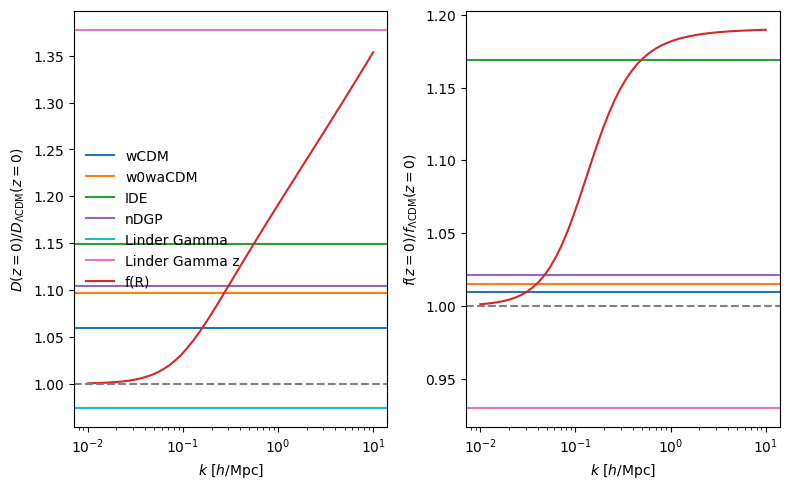

In [4]:
DD = np.array([D_wCDM[-1], D_w0waCDM[-1], D_IDE[-1], D_nDGP[-1], D_g[-1], D_gz[-1]])/D_LCDM[-1]
ff = np.array([f_wCDM[-1], f_w0waCDM[-1], f_IDE[-1], f_nDGP[-1], f_g[-1], f_gz[-1]])/f_LCDM[-1]
models = ['wCDM', 'w0waCDM', 'IDE', 'nDGP', 'Linder Gamma', 'Linder Gamma z']
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:cyan', 'tab:pink', 'tab:red']
fig, ax = plt.subplots(figsize=(8,5), ncols = 2,  sharex=True, sharey=False)
for i in range(len(models)):
    ax[0].axhline( y=DD[i], label=models[i], color=colors[i])
    ax[1].axhline( y=ff[i], color=colors[i])
ax[0].semilogx(k_arr, D_fR[:, -1]/D_LCDM[-1], label='f(R)', color=colors[-1])
ax[1].semilogx(k_arr, f_fR[:, -1]/f_LCDM[-1],  color=colors[-1])
ax[0].axhline( y=1, color='grey', linestyle='--')
ax[1].axhline( y=1, color='grey', linestyle='--')

ax[1].set_ylabel('$f(z=0)/f_{\Lambda \mathrm{CDM}}(z=0)$')
ax[0].set_ylabel('$D(z=0)/D_{\Lambda \mathrm{CDM}}(z=0)$')
ax[0].set_xlabel('$k$ [$h/$Mpc]')
ax[1].set_xlabel('$k$ [$h/$Mpc]')
ax[0].legend(loc='center left', frameon=False)
fig.tight_layout()
#plt.show()

### Plot time-evolution for scale-independent models

In [5]:
background['a_arr'] = np.linspace(0.001,1, 100)
zz = 1./background['a_arr'] -1.

cosmo1 = mg.LCDM(background)
cosmo2 = mg.wCDM(background)
cosmo3 = mg.w0waCDM(background)
cosmo4 = mg.IDE(background)
cosmo5 = mg.nDGP(background)
cosmo6 = mg.Linder_gamma(background)
cosmo7 = mg.Linder_gamma_a(background)

D_LCDM, f_LCDM = cosmo1.growth_parameters()
D_wCDM, f_wCDM = cosmo2.growth_parameters()
D_w0waCDM, f_w0waCDM = cosmo3.growth_parameters()
D_IDE, f_IDE = cosmo4.growth_parameters(xi)
D_nDGP, f_nDGP = cosmo5.growth_parameters(omegarc)
D_g, f_g = cosmo6.growth_parameters(gamma)
D_gz, f_gz = cosmo7.growth_parameters(gamma0, gamma1)

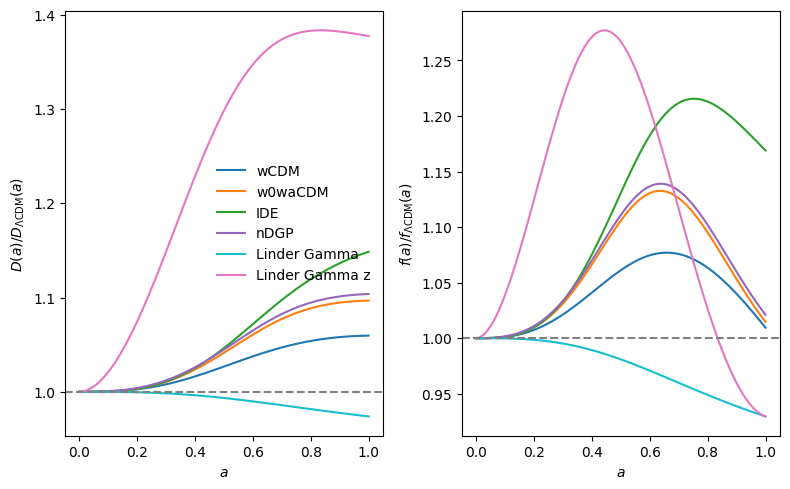

In [6]:
DD = np.array([D_wCDM, D_w0waCDM, D_IDE, D_nDGP, D_g, D_gz])/D_LCDM
ff = np.array([f_wCDM, f_w0waCDM, f_IDE, f_nDGP, f_g, f_gz])/f_LCDM
models = ['wCDM', 'w0waCDM', 'IDE', 'nDGP', 'Linder Gamma', 'Linder Gamma z']
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:cyan', 'tab:pink', 'tab:red']
fig, ax = plt.subplots(figsize=(8,5), ncols = 2,  sharex=True, sharey=False)
for i in range(len(models)):
    ax[0].plot( background['a_arr'], DD[i], label=models[i], color=colors[i])
    ax[1].plot( background['a_arr'], ff[i], color=colors[i])
ax[0].axhline( y=1, color='grey', linestyle='--')
ax[1].axhline( y=1, color='grey', linestyle='--')

ax[1].set_ylabel('$f(a)/f_{\Lambda \mathrm{CDM}}(a)$')
ax[0].set_ylabel('$D(a)/D_{\Lambda \mathrm{CDM}}(a)$')
ax[0].set_xlabel('$a$')
ax[1].set_xlabel('$a$')
ax[0].legend(loc='center right', frameon=False)
fig.tight_layout()